<a href="https://colab.research.google.com/github/rpasquini/metodos_cuantitativos/blob/main/notebooks/python/1_Introduccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Ricardo Pasquini 2025
rpasquini@utdt.edu


# Introducción
En este notebook introduciremos algunas de las principales librerías con las que vamos a estar trabajando. Nuestro objetivo inicial es estimar un modelo de regresión simple utilizando datos de alquileres de 2019.


## Donde estamos

Nuestro ambiente de trabajo ahora es un *notebook* que permite correr codigo, procesar datos, imprimir gráficos, etc. Estos notebooks en general se conocen como "Jupyter notebooks" y tienen como particularidad que el  entorno visual en el que trabajan vive en el navegador. En este momento además, el notebook con el que trabajan "vive en la nube" de Google Colaboratory. Utiliza recursos de la nube de Google para procesar los datos, etc. Para trabajar con nuestros propios datos tendremos que hacerlos accesibles a Google Colab (subiendo los datos al Colab o subiendo los datos a otro servidor al cual las librerias que usemos puedan acceder)

Comentarios relacionados:

- Como dijimos el notebook es solo un entorno visual. En este notebook vamos a trabajar con librerias de análisis cuantitativo construidas sobre el lenguaje Python. Los notebooks de Colab tambien pueden correr código de R.
- Trabajar en la nube "Colab" es conveniente para una clase. También es posible (y a veces necesario) trabajar con un Jupyter Notebook instalado "localmente" en sus computadoras.

- El ambiente virtual provisto por Google Colab va a borrar todo el contenido que se aloje en la memoria virtual después de un rato de inactividad. Lo unico que se mantiene es lo que está escrito en el notebook (el codigo y el texto explicativo). Esto implica que el notebook debe contener todo el codigo desde la carga de los datos hasta su resultado final para que pueda ser reproducido en cualquier momento.  


# Librerías con las que vamos a trabajar

Vamos a arrancar con estas:

- Pandas: Una de las principales librerías para trabajar y manipular datos en Python en forma tabular (llamados **dataframes** y usualmente abreviados **df**)
- Geopandas: Una libreria que busca ser similar a Pandas pero adaptada adicionalmente a  datos con una dimensión geográfica. A los objetos de geopandas los llamamos **geodataframes**.
- StatsModels: Una librería para procesamientos estadísticos.

Al respecto del uso de librerías, además debemos tener en cuenta:

- En general para usar las librerías tienen que estar *instaladas* y además *importadas * al ambiente de trabajo en el que estemos.
- Los Notebooks de Colab vienen con algunas librerías preinstaladas. Solo será necesario importarlas. Para las que no, será necesario instalarlas ( usando un comando de instalacion llamado *pip*).


## Instalamos e importamos geopandas

In [1]:
#!pip install geopandas==0.9.0
!pip install geopandas

Ahora importamos geopandas. Una vez importada, la libreria en cuestion vive en el nombre de la variable que lleva su nombre. Podemos ademas cambiar ese nombre al momento de la importacion usando ***as***

In [2]:
import geopandas as gpd

La fuente de los datos es Properati [properati.com.ar/data/
](https://properati.com.ar/data/).
Fue descargada haciendo un pedido a su base de datos disponible en Google Big Query



El método GeoDataFrame.from_file me permite levantar datos desde un archivo y convertirlos en un **GeoDataFrame**

In [3]:
# Reemplace la siguiente linea por un proceso paso a paso para prevenir errores
# El proceso ahora descarga el zip file, lo descomprime, y recien lee el archivo
# departamentos=gpd.GeoDataFrame.from_file("https://github.com/rpasquini/urban-econometrics/blob/master/data/departamentos2019amba.zip?raw=true")

import requests
import zipfile
import io


# 1. Download the zip file
url = "https://github.com/rpasquini/urban-econometrics/blob/master/data/departamentos2019amba.zip?raw=true"
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# 2. Extract the contents of the zip file
zip_file.extractall("/content/")

#3. Leer el shapefile con Geopandas (notar que el archivo ya se encuentra en el directorio de Colab)
departamentos = gpd.read_file('departamentos2019amba.shp')


In [4]:
departamentos

,bathrooms,bedrooms,country,created_on,currency,descriptio,developmen,end_date,index,l1,...,price,price_peri,rooms,start_date,surface_co,surface_to,title,type,type_i18n,geometry
0,1.0,1.0,Argentina,2019-09-26,ARS,CODIGO: 1819-CRI180 ubicado en: Av. Callao 180...,None,2019-10-10,0,Argentina,...,18000,Mensual,NaN,2019-09-26,52,58,Recoleta. Av. Callao y Av. Alvear. Piso alto. ...,Departamento,Departamento,POINT (106827.294 104558.628)
1,3.0,NaN,Argentina,2019-09-26,ARS,Residencia de estudiantes y viajeros. Son dos ...,None,2019-11-04,1,Argentina,...,45000,Mensual,NaN,2019-09-26,219,219,Departamento - Balvanera,Departamento,Departamento,POINT (106347.88 102524.692)
2,1.0,2.0,Argentina,2019-09-26,ARS,CODIGO: 1348-AF021227 ubicado en: Tacuari 263 ...,None,2019-09-28,2,Argentina,...,18500,Mensual,NaN,2019-09-26,61,67,3 ambientes con patio 61 m2 propios bajas expe...,Departamento,Departamento,POINT (107658.254 102034.095)
3,NaN,NaN,Argentina,2019-09-26,ARS,Departamento de dos ambientes a 200 metros de ...,None,2020-02-12,4,Argentina,...,11000,Mensual,NaN,2019-09-26,38,38,Departamento - San Justo,Departamento,Departamento,POINT (91709.24 94331.755)
4,1.0,1.0,Argentina,2019-09-26,ARS,CODIGO: 733-1600MARIANOA ubicado en: MARIANO A...,None,2019-11-10,5,Argentina,...,18500,Mensual,NaN,2019-09-26,39,49,EXCELENTE DEPARTAMENTO 2 AMB CON PATIO 49 MTS ...,Departamento,Departamento,POINT (99129.692 105739.092)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50648,1.0,1.0,Argentina,2019-02-27,ARS,Corredor Responsable: Martin Macagno - CUCICBA...,None,2019-04-24,60856,Argentina,...,17500,Mensual,2.0,2019-02-27,45,45,ALQUILER DEPARTAMENTO 2 AMB A ESTRENAR P CHACA...,Departamento,Departamento,POINT (101961.679 100016.721)
50649,1.0,NaN,Argentina,2019-02-27,ARS,**** ALQUILER DUEÑO DIRECTO DE DEPARTAMENTO DE...,None,2019-03-29,60857,Argentina,...,11000,Mensual,NaN,2019-02-27,43,49,Carlos A Lopez 2700 1° - $ 11.000 - Departam...,Departamento,Departamento,POINT (96460.074 105041.354)
50650,2.0,4.0,Argentina,2019-02-27,ARS,Corredor Responsable: JAVIER HERNANDEZ - CUCIC...,None,2019-03-10,60858,Argentina,...,40000,Mensual,5.0,2019-02-27,150,150,Alquiler-Triplex c/ cochera - sin expensas.,Departamento,Departamento,POINT (95515.687 105731.369)
50651,1.0,1.0,Argentina,2019-02-27,ARS,Xintel (DIP-DIP-632) EN ALQUILER DEPARTAMENTO ...,None,2019-06-25,60859,Argentina,...,4500,Mensual,2.0,2019-02-27,40,40,DEPARTAMENTO EN ALQUILER,Departamento,Departamento,POINT (90520.492 106346.015)


In [5]:
departamentos.head()

,bathrooms,bedrooms,country,created_on,currency,descriptio,developmen,end_date,index,l1,...,price,price_peri,rooms,start_date,surface_co,surface_to,title,type,type_i18n,geometry
0,1.0,1.0,Argentina,2019-09-26,ARS,CODIGO: 1819-CRI180 ubicado en: Av. Callao 180...,None,2019-10-10,0,Argentina,...,18000,Mensual,NaN,2019-09-26,52,58,Recoleta. Av. Callao y Av. Alvear. Piso alto. ...,Departamento,Departamento,POINT (106827.294 104558.628)
1,3.0,NaN,Argentina,2019-09-26,ARS,Residencia de estudiantes y viajeros. Son dos ...,None,2019-11-04,1,Argentina,...,45000,Mensual,NaN,2019-09-26,219,219,Departamento - Balvanera,Departamento,Departamento,POINT (106347.88 102524.692)
2,1.0,2.0,Argentina,2019-09-26,ARS,CODIGO: 1348-AF021227 ubicado en: Tacuari 263 ...,None,2019-09-28,2,Argentina,...,18500,Mensual,NaN,2019-09-26,61,67,3 ambientes con patio 61 m2 propios bajas expe...,Departamento,Departamento,POINT (107658.254 102034.095)
3,NaN,NaN,Argentina,2019-09-26,ARS,Departamento de dos ambientes a 200 metros de ...,None,2020-02-12,4,Argentina,...,11000,Mensual,NaN,2019-09-26,38,38,Departamento - San Justo,Departamento,Departamento,POINT (91709.24 94331.755)
4,1.0,1.0,Argentina,2019-09-26,ARS,CODIGO: 733-1600MARIANOA ubicado en: MARIANO A...,None,2019-11-10,5,Argentina,...,18500,Mensual,NaN,2019-09-26,39,49,EXCELENTE DEPARTAMENTO 2 AMB CON PATIO 49 MTS ...,Departamento,Departamento,POINT (99129.692 105739.092)


## Descripcion rápida de los datos


In [6]:
departamentos.columns

Index(['bathrooms', 'bedrooms', 'country', 'created_on', 'currency',
       'descriptio', 'developmen', 'end_date', 'index', 'l1', 'l2', 'l3', 'l4',
       'l5', 'l6', 'lat', 'lon', 'operation', 'operation_', 'price',
       'price_peri', 'rooms', 'start_date', 'surface_co', 'surface_to',
       'title', 'type', 'type_i18n', 'geometry'],
      dtype='object')

In [7]:
departamentos.shape

(50653, 29)

Puedo llamar a una columna en particular del dataframe si la escribo entre corchetes

In [8]:
departamentos['l2']

,l2
0,Capital Federal
1,Capital Federal
2,Capital Federal
3,Bs.As. G.B.A. Zona Oeste
4,Capital Federal
...,...
50648,Capital Federal
50649,Capital Federal
50650,Capital Federal
50651,Bs.As. G.B.A. Zona Norte


En algunos casos funcionará que solo escriba . y el nombre de la columna. (esto no sirve, por ejemplo si las columnas  tienen espacios en el nombre)


In [9]:
departamentos.l2

,l2
0,Capital Federal
1,Capital Federal
2,Capital Federal
3,Bs.As. G.B.A. Zona Oeste
4,Capital Federal
...,...
50648,Capital Federal
50649,Capital Federal
50650,Capital Federal
50651,Bs.As. G.B.A. Zona Norte


Luego puedo ver cuales son los valores unicos que toma la variable:

In [10]:
departamentos['l2'].unique()

array(['Capital Federal', 'Bs.As. G.B.A. Zona Oeste',
       'Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Norte',
       'Buenos Aires Interior'], dtype=object)

In [11]:
departamentos.dtypes

,0
bathrooms,float64
bedrooms,float64
country,object
created_on,object
currency,object
descriptio,object
developmen,object
end_date,object
index,int64
l1,object


<Axes: >

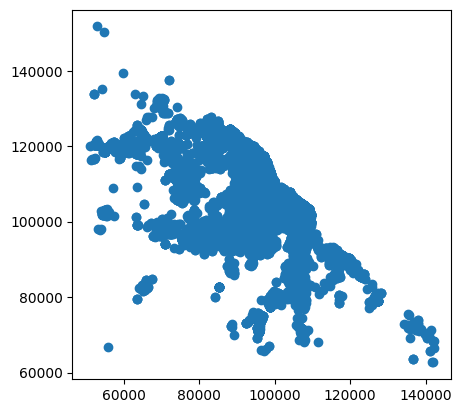

In [12]:
departamentos.plot()

In [13]:
departamentos.price.describe()

,price
count,5.065300e+04
mean,1.780301e+04
std,1.713533e+04
min,5.000000e+01
25%,1.050000e+04
50%,1.500000e+04
75%,2.100000e+04
max,1.500000e+06


## Estudiando un subconjunto de datos (filas del dataframe)

Para "filtrar" el dataframe usamos el método .loc, especificando entre corchetes la condición que filtra nuestros datos

Por ejemplo, si queremos departamentos mayores a $100000
departamentos.loc[(departamentos.price>100000)]

Para escribir una condicion recuerden que pueden utilizar los siguientes lógicos:

```==    para chequear la  condicion "equivale a" o "igual a" va doble igual  ```

```!= distinto a ```

```> mayor a  ```

```>= mayor o igual a ```

```< menor a ```

```<= menor o igual a ```

En el caso de querer usar dos condiciones o más:

```(esta condicion) & (esta condicion) ``` Se cumple esta condicion Y esta otra  

```(esta condicion) | (esta condicion) ``` Se cumple esta condicion O esta otra
   

Recuerden que las condiciones tiene que ir  en parentesis!


Vean los siguientes ejemplos:






Filtrar los departamentos que estan en Capital Federal


In [14]:
departamentos.loc[departamentos['l2']=="Capital Federal"]

,bathrooms,bedrooms,country,created_on,currency,descriptio,developmen,end_date,index,l1,...,price,price_peri,rooms,start_date,surface_co,surface_to,title,type,type_i18n,geometry
0,1.0,1.0,Argentina,2019-09-26,ARS,CODIGO: 1819-CRI180 ubicado en: Av. Callao 180...,None,2019-10-10,0,Argentina,...,18000,Mensual,NaN,2019-09-26,52,58,Recoleta. Av. Callao y Av. Alvear. Piso alto. ...,Departamento,Departamento,POINT (106827.294 104558.628)
1,3.0,NaN,Argentina,2019-09-26,ARS,Residencia de estudiantes y viajeros. Son dos ...,None,2019-11-04,1,Argentina,...,45000,Mensual,NaN,2019-09-26,219,219,Departamento - Balvanera,Departamento,Departamento,POINT (106347.88 102524.692)
2,1.0,2.0,Argentina,2019-09-26,ARS,CODIGO: 1348-AF021227 ubicado en: Tacuari 263 ...,None,2019-09-28,2,Argentina,...,18500,Mensual,NaN,2019-09-26,61,67,3 ambientes con patio 61 m2 propios bajas expe...,Departamento,Departamento,POINT (107658.254 102034.095)
4,1.0,1.0,Argentina,2019-09-26,ARS,CODIGO: 733-1600MARIANOA ubicado en: MARIANO A...,None,2019-11-10,5,Argentina,...,18500,Mensual,NaN,2019-09-26,39,49,EXCELENTE DEPARTAMENTO 2 AMB CON PATIO 49 MTS ...,Departamento,Departamento,POINT (99129.692 105739.092)
5,NaN,NaN,Argentina,2019-09-26,ARS,MONOAMBIENTE EN ALMAGRO<br>AMPLIO Y LUMINOSO<b...,None,2019-10-02,6,Argentina,...,9000,Mensual,1.0,2019-09-26,30,30,Departamento - Almagro,Departamento,Departamento,POINT (103825.371 102026.223)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50638,1.0,NaN,Argentina,2019-02-27,ARS,ALQUILER EXCELENTE MONOAMBIENTE MUY LUMINOSO A...,None,2019-03-16,60841,Argentina,...,12500,Mensual,1.0,2019-02-27,32,37,ALQUILER EXCELENTE MONOAMBIENTE MUY LUMINOSO A...,Departamento,Departamento,POINT (99005.286 106249.504)
50639,1.0,1.0,Argentina,2019-02-27,ARS,Monoambiente de 35m2 Totales en complejo Green...,None,2019-07-17,60842,Argentina,...,15000,None,1.0,2019-02-27,27,32,Excelente departamento en Alquiler con cochera,Departamento,Departamento,POINT (99047.178 106126.635)
50648,1.0,1.0,Argentina,2019-02-27,ARS,Corredor Responsable: Martin Macagno - CUCICBA...,None,2019-04-24,60856,Argentina,...,17500,Mensual,2.0,2019-02-27,45,45,ALQUILER DEPARTAMENTO 2 AMB A ESTRENAR P CHACA...,Departamento,Departamento,POINT (101961.679 100016.721)
50649,1.0,NaN,Argentina,2019-02-27,ARS,**** ALQUILER DUEÑO DIRECTO DE DEPARTAMENTO DE...,None,2019-03-29,60857,Argentina,...,11000,Mensual,NaN,2019-02-27,43,49,Carlos A Lopez 2700 1° - $ 11.000 - Departam...,Departamento,Departamento,POINT (96460.074 105041.354)


Filtrar los departamentos que valen más de $100000 Y que además estan en capital federal

In [15]:
departamentos.loc[(departamentos.price>100000)&(departamentos.l2=="Capital Federal")]

,bathrooms,bedrooms,country,created_on,currency,descriptio,developmen,end_date,index,l1,...,price,price_peri,rooms,start_date,surface_co,surface_to,title,type,type_i18n,geometry
200,3.0,NaN,Argentina,2019-12-20,ARS,*** A ESTRENAR ***<br><br>Espectacular 4 amb. ...,None,2020-05-14,255,Argentina,...,160000,Mensual,4.0,2019-12-20,130,149,Espectacular 158m2 - UNICO 3 Suites - Dependen...,Departamento,Departamento,POINT (102290.361 107196.883)
985,NaN,NaN,Argentina,2019-04-15,ARS,test test test test,None,2019-07-26,1210,Argentina,...,1232134,Mensual,1.0,2019-04-15,123,123,Departamento alquiler,Departamento,Departamento,POINT (101574.557 108245.646)
1346,1.0,1.0,Argentina,2019-01-31,ARS,Corredor Responsable: JAVIER HERNANDEZ - CUCIC...,None,2019-08-07,1662,Argentina,...,120000,None,2.0,2019-01-31,160,200,Alquiler Triplex Los Molinos. Expensas incluidas,Departamento,Departamento,POINT (109174.738 102231.768)
1621,2.0,3.0,Argentina,2019-03-08,ARS,ALQUILER 4 AMBIENTES EN PALERMO SIN MUEBLES EN...,None,2019-04-30,1983,Argentina,...,139000,Mensual,4.0,2019-03-08,157,168,ALQUILER DÚPLEX EN PISO ALTO TORRE DE CATEGORIA,Departamento,Departamento,POINT (105163.595 105378.695)
2260,2.0,NaN,Argentina,2019-05-09,ARS,PISO EN EDIFICIO DE ESTILO FRANCÉS DE 12 PISOS...,None,2019-06-14,2757,Argentina,...,105000,Mensual,4.0,2019-05-09,161,168,Venta piso de 4 ambientes con cochera,Departamento,Departamento,POINT (104006.53 106075.998)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48649,3.0,3.0,Argentina,2019-07-31,ARS,Departamento único en piso altísimo con todos ...,None,2019-08-14,58561,Argentina,...,119000,None,4.0,2019-07-31,157,157,ALQUILER TORRES BULNES GRAN RECEPCION 3 DORM. ...,Departamento,Departamento,POINT (105196.369 105467.289)
48742,4.0,3.0,Argentina,2019-07-31,ARS,Alquiler Departamento tipo duplex. Rodea de un...,None,2019-08-14,58665,Argentina,...,130000,None,5.0,2019-07-31,242,396,Casa dentro de Edificio. Seguridad Coch Doble-...,Departamento,Departamento,POINT (99932.663 107642.892)
49168,3.0,4.0,Argentina,2019-07-31,ARS,Semipiso 5 amb c/dependencia y 2 cocheras cubi...,None,2019-08-14,59165,Argentina,...,107000,None,5.0,2019-07-31,190,200,Semipiso 5 ambientes con dependencia y 2 coche...,Departamento,Departamento,POINT (103318.736 105729.364)
49795,3.0,3.0,Argentina,2019-08-01,ARS,Planta de categoría en el Palacio Bellini! El ...,None,2019-08-14,59894,Argentina,...,115000,None,4.0,2019-08-01,145,155,PALACIO BELLINI - PALERMO (APTO PROFESIONAL CO...,Departamento,Departamento,POINT (104547.555 105474.833)


Es posible combinar los filtros con otros metodos para describir o graficar los datos en una sola linea de codigo. Para eso filtro primero y grafico o describo despues.


In [16]:
departamentos.loc[departamentos['l2']=="Capital Federal"].price.describe()

,price
count,3.347200e+04
mean,1.855286e+04
std,1.733385e+04
min,5.000000e+01
25%,1.150000e+04
50%,1.500000e+04
75%,2.200000e+04
max,1.232134e+06


<Axes: >

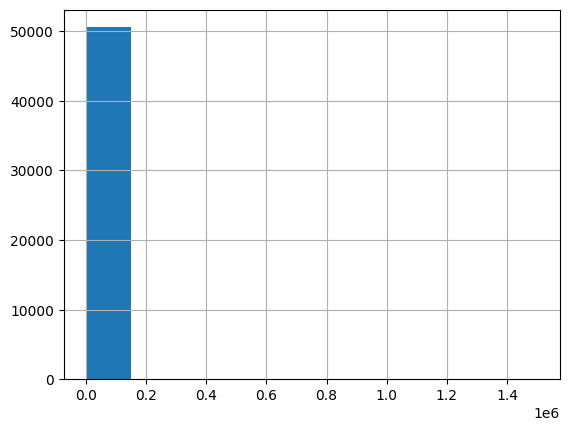

In [17]:
departamentos.price.hist()

<Axes: >

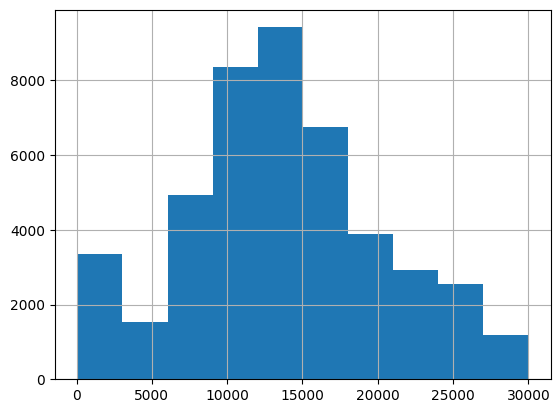

In [18]:
departamentos.price.loc[departamentos.price<30000].hist()

El método plot() en el GeoDataFrame permite mapear los datos. Podrán reconocer el AMBA


<Axes: >

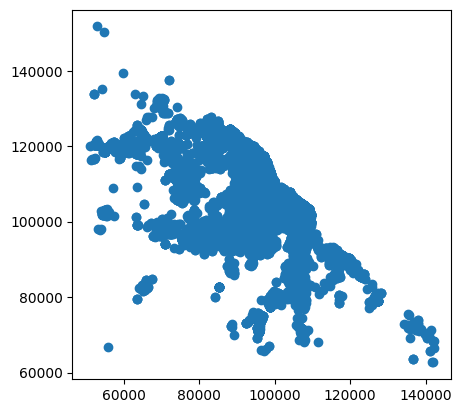

In [19]:
departamentos.plot()

Lo mismo pero filtrando primero los datos a Capital Federal

<Axes: >

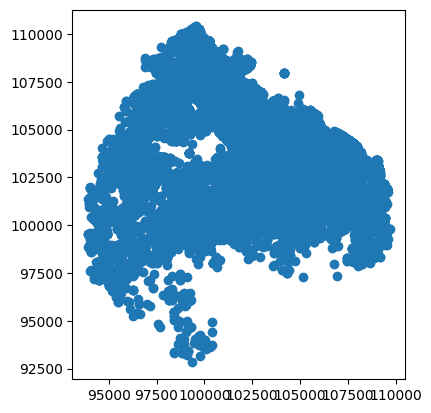

In [20]:
departamentos[departamentos['l2']=="Capital Federal"].plot()

Lo mismo pero ahora quitaremos algunos outliers (precios mayores a 80000) y en el mapeamos con colores segun el precio usando el método: `plot(column='price')`

<Axes: >

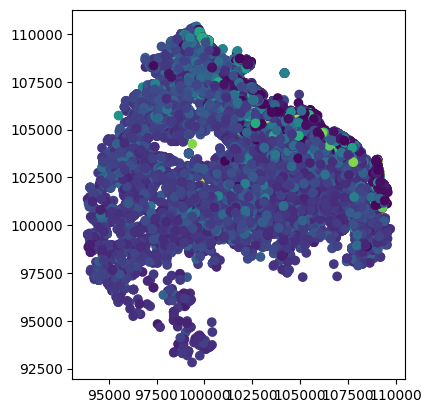

In [21]:
departamentos.loc[(departamentos['l2']=="Capital Federal")&(departamentos['price']<80000)].plot(column='price')

# OLS

Statsmodels es la librería de operaciones estadísticas que usaremos para estimar OLS

In [22]:
import statsmodels.api as sm

Nuestro modelo a explorar es el siguiente:

$price_i=\beta_0+ \beta_1*bedrooms_i+\epsilon_i$

In [23]:
import statsmodels.formula.api as smf

In [24]:
modelo=smf.ols('price ~ bedrooms', data=departamentos)

In [25]:
resultados=modelo.fit()

In [26]:
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1443.
Date:                Fri, 13 Jun 2025   Prob (F-statistic):          7.68e-308
Time:                        11:33:08   Log-Likelihood:            -3.0876e+05
No. Observations:               27879   AIC:                         6.175e+05
Df Residuals:                   27877   BIC:                         6.175e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.151e+04    205.145     56.088      0.0

Nuestro resultado es:
precio= 11500+ 4253* bedrooms

## Graficando

El (geo)dataframe tiene algunos metodos que permiten graficar directamente

In [27]:
departamentos=departamentos.dropna(subset=['bedrooms','price'])

<Axes: xlabel='bedrooms', ylabel='price'>

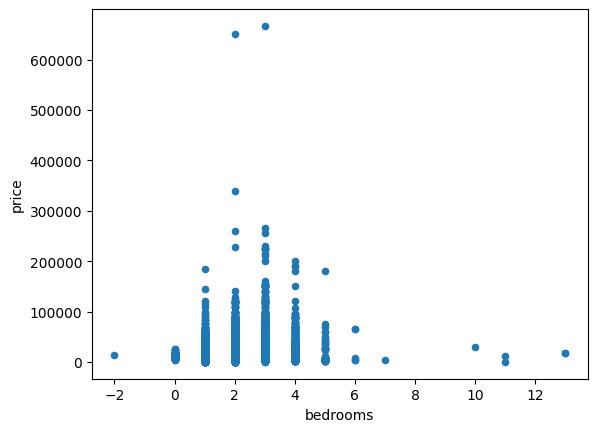

In [28]:
departamentos.plot.scatter(x='bedrooms',  y='price')

Scatter plot


<Axes: xlabel='bedrooms', ylabel='price'>

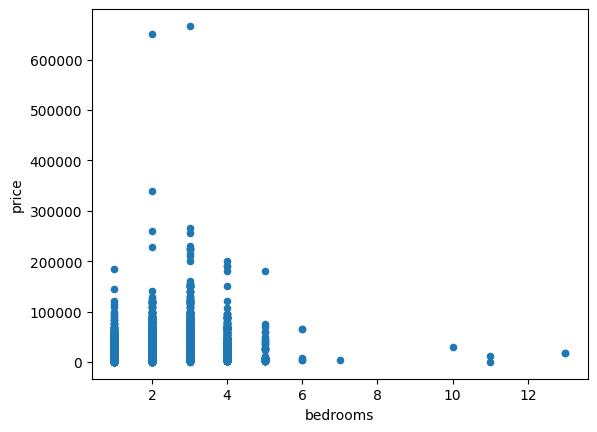

In [29]:
departamentos.loc[departamentos['bedrooms']>0].plot.scatter(x='bedrooms',  y='price')

Para hacer otros graficos más complejos vamos a usar otras librerias como matplotlib

In [30]:
ypred = resultados.predict(departamentos['bedrooms'])

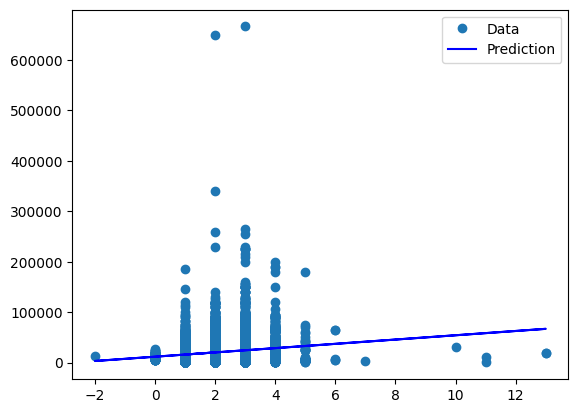

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(departamentos['bedrooms'], departamentos['price'], 'o', label="Data")
ax.plot(departamentos['bedrooms'], ypred, 'b-', label="Prediction")
#ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
ax.legend(loc="best");

# Ejemplo de ploteo con layers (capas)
Vamos a utilizar la capa de límites de partidos y departamentos del IGN.
Ver más aqui:
https://datos.gob.ar/dataset/ign-unidades-territoriales

In [34]:
url = "https://github.com/rpasquini/urban-econometrics/blob/master/data/ign_departamento.zip?raw=true"
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# 2. Extract the contents of the zip file
zip_file.extractall("/content/")

#3. Leer el shapefile con Geopandas (notar que el archivo ya se encuentra en el directorio de Colab)
limites = gpd.read_file('ign_departamento.shp')

(-35.0, -34.1)

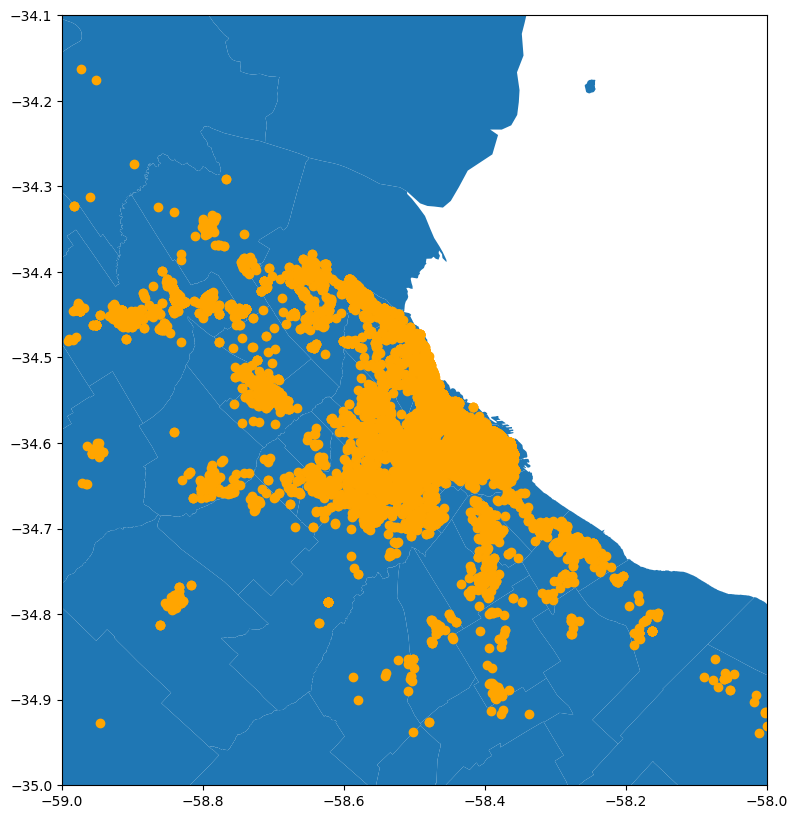

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))
limites.to_crs("EPSG:4326").plot(ax=ax)
departamentos.to_crs("EPSG:4326").plot(ax=ax,color='orange')
ax.set_xlim(-59, -58)
ax.set_ylim(-35, -34.1)

(-35.0, -34.1)

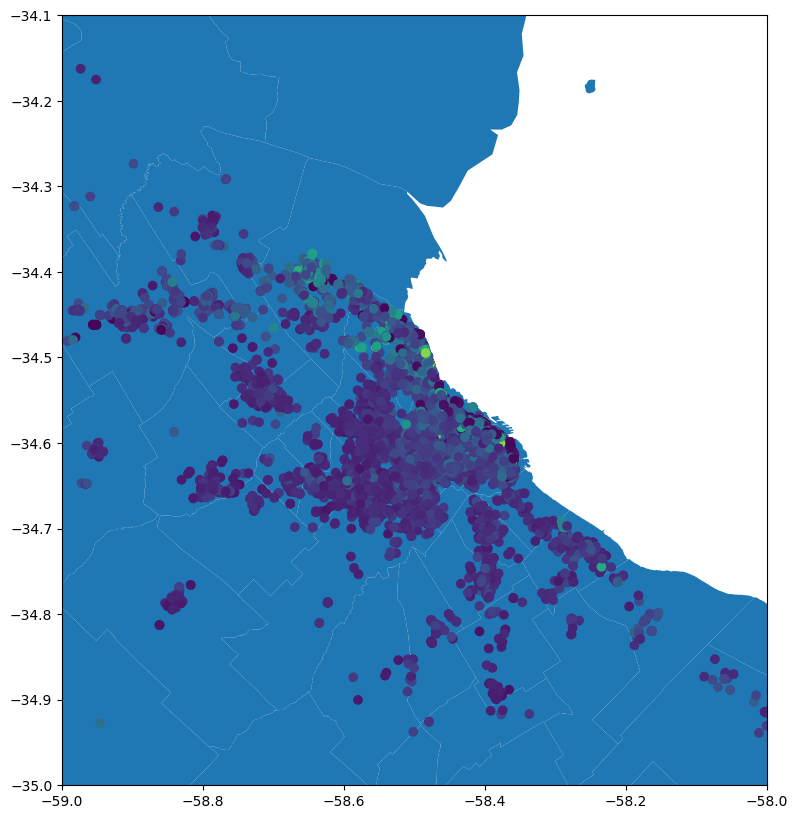

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
limites.to_crs("EPSG:4326").plot(ax=ax)
departamentos.loc[departamentos.price<80000].to_crs("EPSG:4326").plot(ax=ax,column='price')
ax.set_xlim(-59, -58)
ax.set_ylim(-35, -34.1)